## 1. Import Required Libraries

In [1]:
# Data manipulation lib
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization lib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')

# Machine Learning - Preprocessing lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Machine Learning - Models
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Machine Learning - Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

# Set random seed for reproducibility
np.random.seed(42)

print("imported")


imported


## 2. Dataset Load and Explore Data

In [2]:
# Load and Display dataset
df = pd.read_csv('retail_store_sales.csv')

print(f"Dataset Shape: {df.shape} and First 5 rows:")
df.head()

Dataset Shape: (12575, 11) and First 5 rows:


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [3]:
# Dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


here i


In [4]:
# Check missing values
print("Missing Values:")

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})

print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

Missing Values:
                  Missing Count  Percentage
Discount Applied           4199   33.391650
Item                       1213    9.646123
Price Per Unit              609    4.842942
Quantity                    604    4.803181
Total Spent                 604    4.803181


Target Variable (Discount Applied) Distribution:

Original Distribution:
Discount Applied
True     4219
False    4157
Name: count, dtype: int64

Missing values: 4199


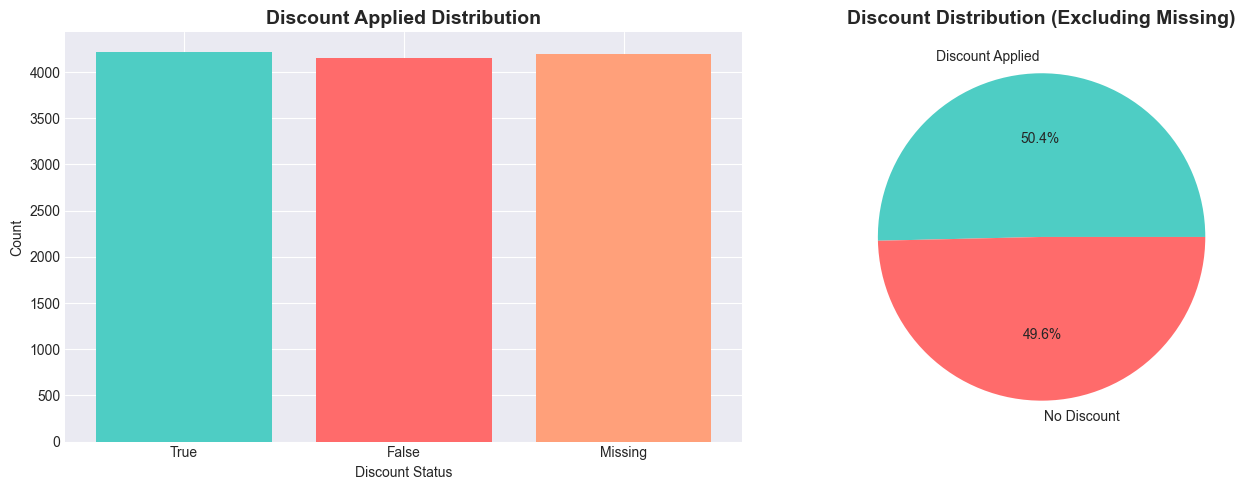

In [5]:
# Target variable distribution (Discount Applied)
print("Target Variable (Discount Applied) Distribution:")

print("\nOriginal Distribution:")
print(df['Discount Applied'].value_counts())
print(f"\nMissing values: {df['Discount Applied'].isnull().sum()}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
discount_counts = df['Discount Applied'].value_counts()
axes[0].bar(['True', 'False', 'Missing'],
            [discount_counts.get(True, 0), discount_counts.get(False, 0), df['Discount Applied'].isnull().sum()],
            color=['#4ECDC4', '#FF6B6B', '#FFA07A'])
axes[0].set_title('Discount Applied Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Discount Status')

# Pie chart (excluding missing)
discount_clean = df['Discount Applied'].dropna()
discount_clean.value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                    colors=['#4ECDC4', '#FF6B6B'], labels=['Discount Applied', 'No Discount'])
axes[1].set_title('Discount Distribution (Excluding Missing)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## 3. Exploratory Data Analysis (EDA)

In [6]:
# Statistical summary
print("Statistical Summary:")

df.describe()

Statistical Summary:


,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


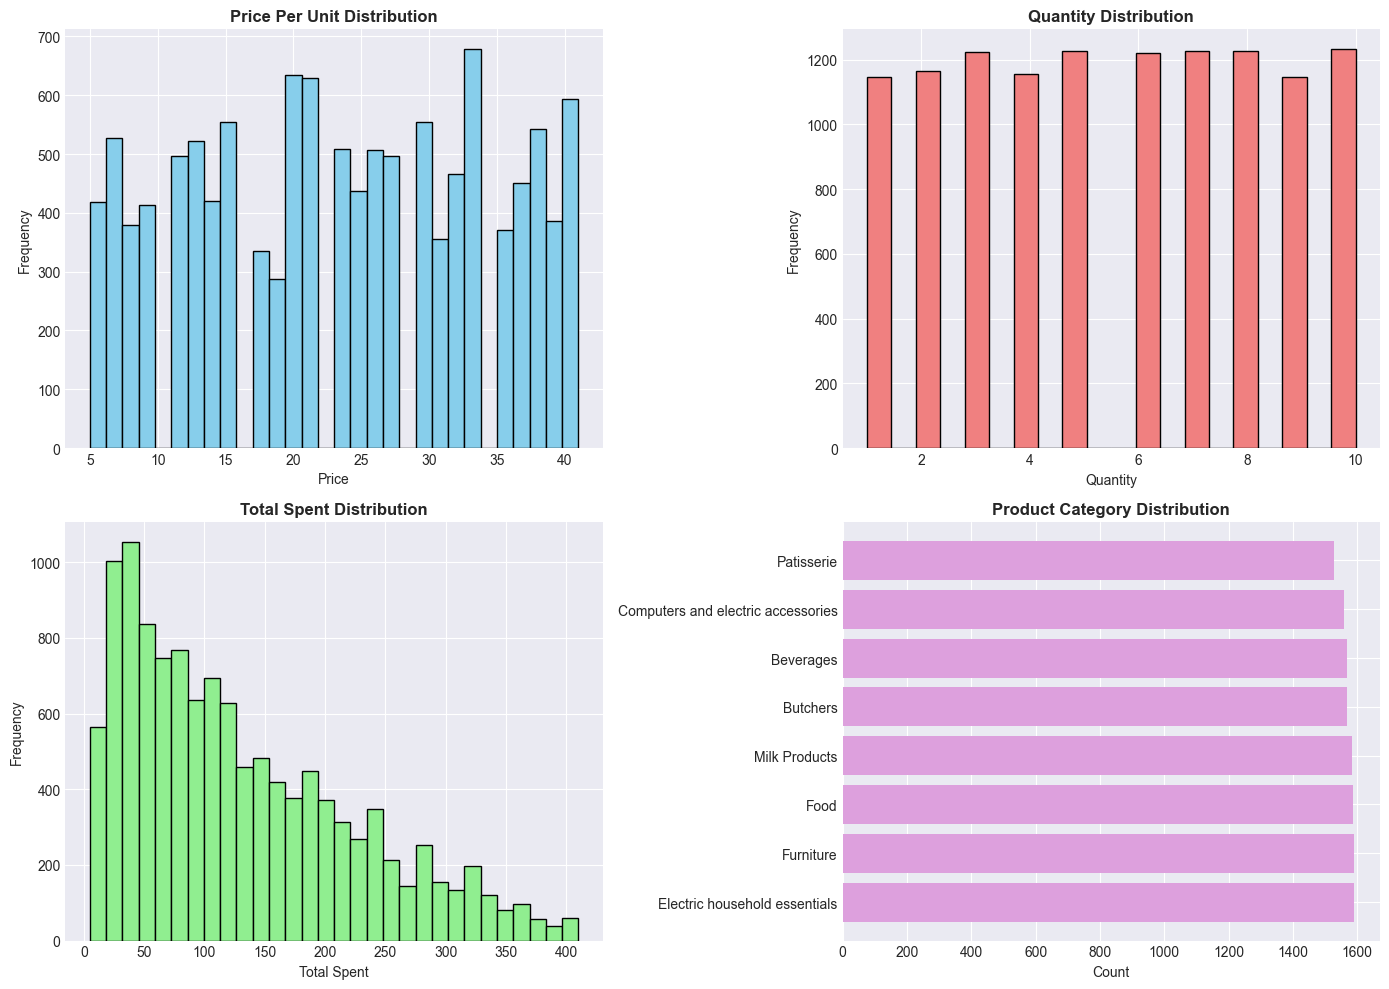

In [7]:
# Visualize numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Price Per Unit
axes[0, 0].hist(df['Price Per Unit'].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Price Per Unit Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

# Quantity
axes[0, 1].hist(df['Quantity'].dropna(), bins=20, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Quantity Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Quantity')
axes[0, 1].set_ylabel('Frequency')

# Total Spent
axes[1, 0].hist(df['Total Spent'].dropna(), bins=30, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Total Spent Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Total Spent')
axes[1, 0].set_ylabel('Frequency')

# Category
category_counts = df['Category'].value_counts()
axes[1, 1].barh(category_counts.index[:8], category_counts.values[:8], color='plum')
axes[1, 1].set_title('Product Category Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Count')

plt.tight_layout()
plt.show()

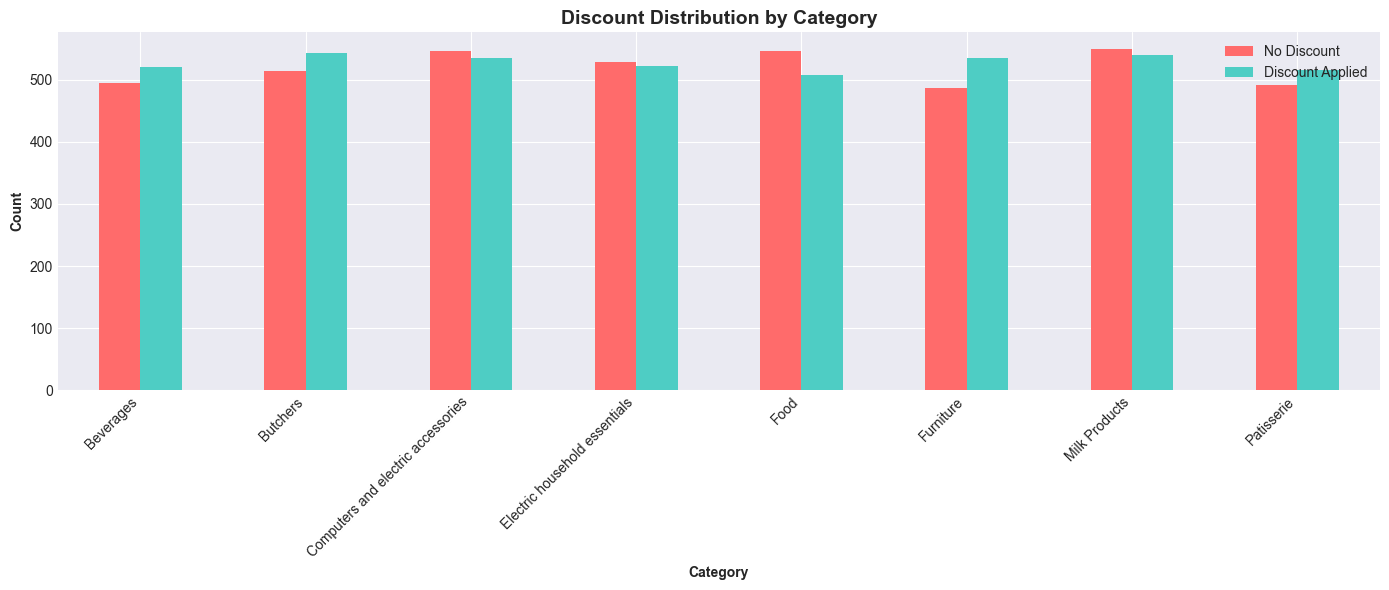

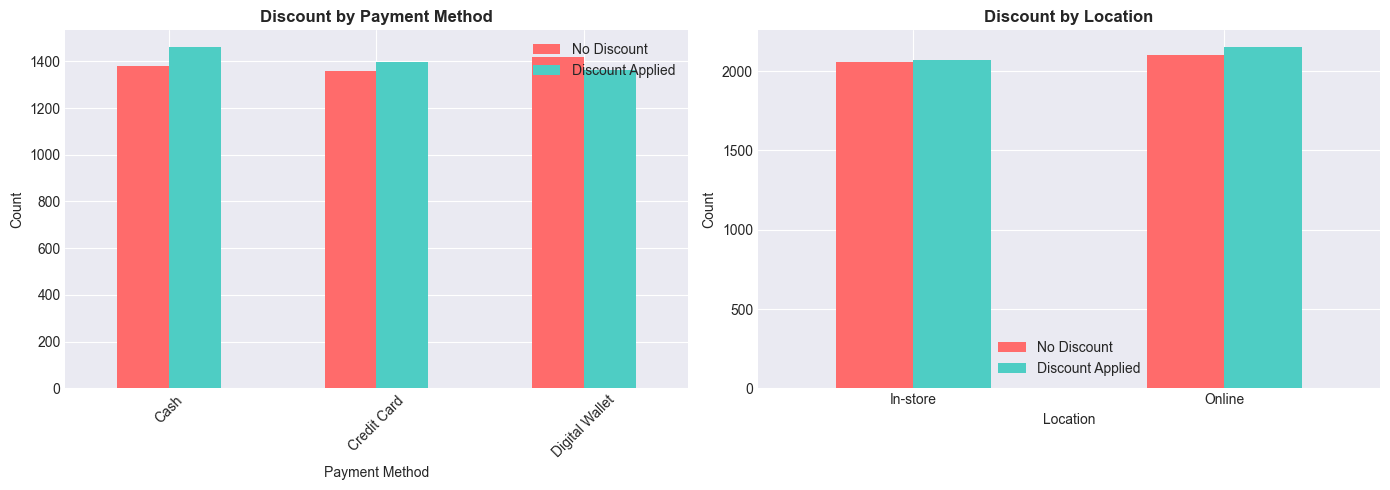

In [8]:
# Discount vs Category Analysis
df_clean = df[df['Discount Applied'].notna()].copy()

# Group by category and discount
discount_by_category = df_clean.groupby(['Category', 'Discount Applied']).size().unstack(fill_value=0)
discount_by_category.plot(kind='bar', stacked=False, color=['#FF6B6B', '#4ECDC4'], figsize=(14, 6))
plt.title('Discount Distribution by Category', fontweight='bold', fontsize=14)
plt.xlabel('Category', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(['No Discount', 'Discount Applied'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




# Discount vs Payment Method and Location
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df_clean = df[df['Discount Applied'].notna()].copy()

# Payment Method
payment_discount = df_clean.groupby(['Payment Method', 'Discount Applied']).size().unstack(fill_value=0)
payment_discount.plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Discount by Payment Method', fontweight='bold')
axes[0].set_xlabel('Payment Method')
axes[0].set_ylabel('Count')
axes[0].legend(['No Discount', 'Discount Applied'])
axes[0].tick_params(axis='x', rotation=45)

# Location
location_discount = df_clean.groupby(['Location', 'Discount Applied']).size().unstack(fill_value=0)
location_discount.plot(kind='bar', ax=axes[1], color=['#FF6B6B', '#4ECDC4'])
axes[1].set_title('Discount by Location', fontweight='bold')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Count')
axes[1].legend(['No Discount', 'Discount Applied'])
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

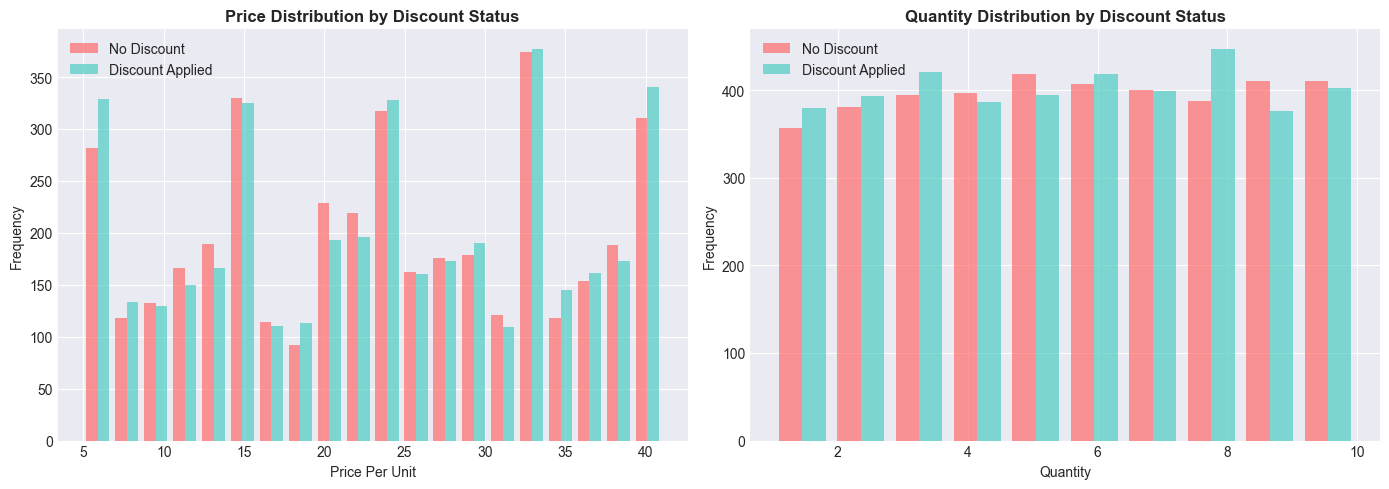

In [9]:
# Price and Quantity impact on Discount
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df_clean = df[df['Discount Applied'].notna()].copy()

# Price distribution by discount
axes[0].hist([df_clean[df_clean['Discount Applied']==False]['Price Per Unit'].dropna(),
              df_clean[df_clean['Discount Applied']==True]['Price Per Unit'].dropna()],
             bins=20, label=['No Discount', 'Discount Applied'], color=['#FF6B6B', '#4ECDC4'], alpha=0.7)
axes[0].set_title('Price Distribution by Discount Status', fontweight='bold')
axes[0].set_xlabel('Price Per Unit')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Quantity distribution by discount
axes[1].hist([df_clean[df_clean['Discount Applied']==False]['Quantity'].dropna(),
              df_clean[df_clean['Discount Applied']==True]['Quantity'].dropna()],
             bins=10, label=['No Discount', 'Discount Applied'], color=['#FF6B6B', '#4ECDC4'], alpha=0.7)
axes[1].set_title('Quantity Distribution by Discount Status', fontweight='bold')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

Computing Correlation Matrix


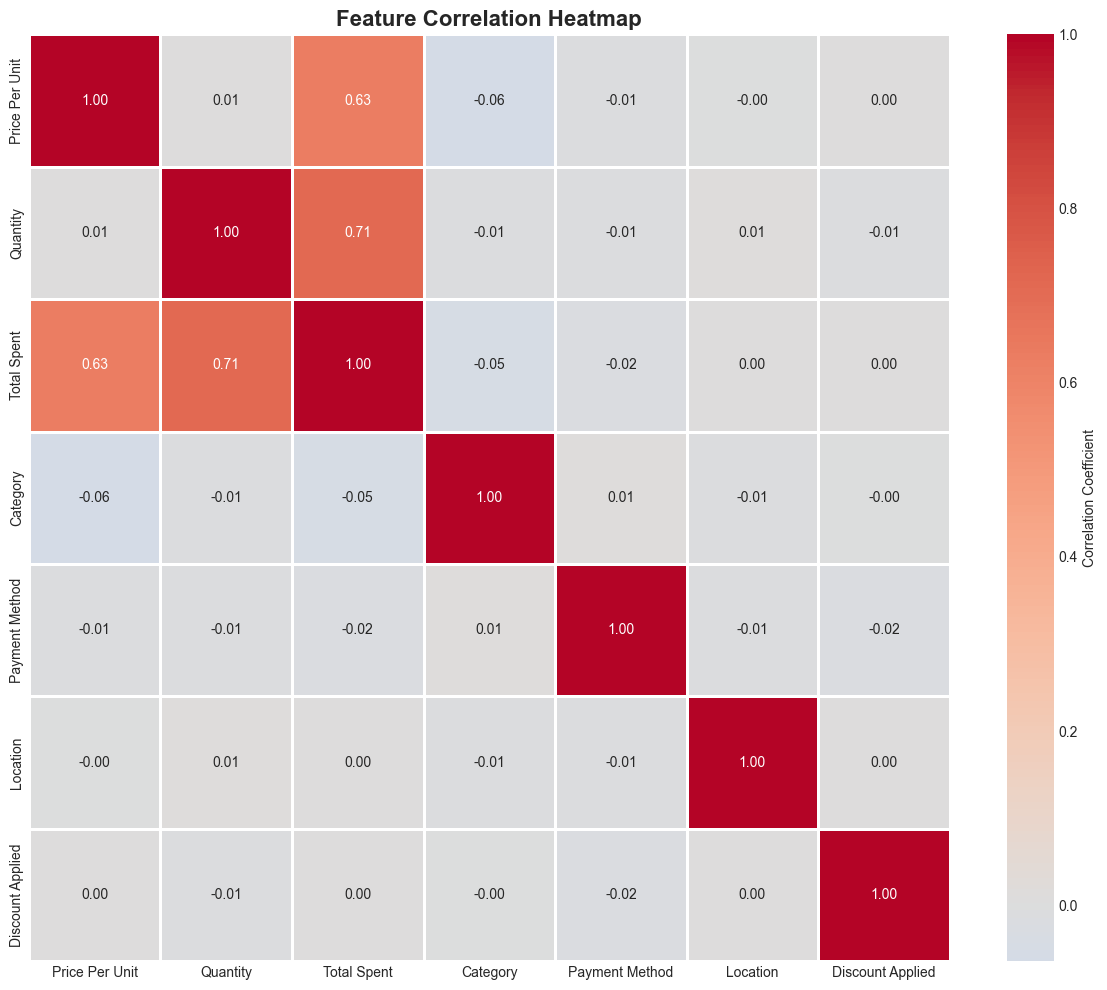

 Correlation analysis complete


In [10]:
# Correlation analysis
print("Computing Correlation Matrix")


df_corr = df.copy()
df_corr = df_corr.dropna(subset=['Discount Applied'])
df_corr['Discount Applied'] = df_corr['Discount Applied'].map({True: 1, False: 0})

# Encode categorical features for correlation
label_enc_temp = {}
for col in ['Category', 'Payment Method', 'Location']:
    le = LabelEncoder()
    df_corr[col] = le.fit_transform(df_corr[col].fillna('Missing'))
    label_enc_temp[col] = le

numerical_columns = ['Price Per Unit', 'Quantity', 'Total Spent',
                     'Category', 'Payment Method', 'Location', 'Discount Applied']

correlation_matrix = df_corr[numerical_columns].corr()

# Visualize correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, linewidths=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Heatmap', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

print(" Correlation analysis complete")

## 4. Data Preprocessing & Feature Engineering

In [11]:
# Create a copy for preprocessing
df_processed = df.copy()

# Convert Transaction Date to datetime
df_processed['Transaction Date'] = pd.to_datetime(df_processed['Transaction Date'])

# Extract date features
df_processed['Year'] = df_processed['Transaction Date'].dt.year
df_processed['Month'] = df_processed['Transaction Date'].dt.month
df_processed['Day'] = df_processed['Transaction Date'].dt.day
df_processed['DayOfWeek'] = df_processed['Transaction Date'].dt.dayofweek
df_processed['Quarter'] = df_processed['Transaction Date'].dt.quarter

# Drop irrelevant columns
df_processed = df_processed.drop(['Transaction ID', 'Customer ID', 'Item', 'Transaction Date'], axis=1)

print(" Feature engineering completed")
print(f"New shape: {df_processed.shape}")
df_processed.head()

 Feature engineering completed
New shape: (12575, 12)


,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Discount Applied,Year,Month,Day,DayOfWeek,Quarter
0,Patisserie,18.5,10.0,185.0,Digital Wallet,Online,True,2024,4,8,0,2
1,Milk Products,29.0,9.0,261.0,Digital Wallet,Online,True,2023,7,23,6,3
2,Butchers,21.5,2.0,43.0,Credit Card,Online,False,2022,10,5,2,4
3,Beverages,27.5,9.0,247.5,Credit Card,Online,NaN,2022,5,7,5,2
4,Food,12.5,7.0,87.5,Digital Wallet,Online,False,2022,10,2,6,4


In [12]:
# MISSING VALUES

print("MISSING / NULL VALUES")


print(f"\nRemove rows with missing target")
print(f"   Rows before: {len(df_processed)}")
df_processed = df_processed[df_processed['Discount Applied'].notna()].copy()
print(f"   Rows after: {len(df_processed)}")
print(f"   Removed: {12575 - len(df_processed)} rows (33.4%)")

# Convert boolean to binary
df_processed['Discount Applied'] = df_processed['Discount Applied'].map({True: 1, False: 0})

# Solution 2: Impute numerical features
print(f"\nImpute numerical features")
numerical_cols = ['Price Per Unit', 'Quantity', 'Total Spent']
imputer = SimpleImputer(strategy='median')
df_processed[numerical_cols] = imputer.fit_transform(df_processed[numerical_cols])

print(f"   Imputed using MEDIAN strategy")
print(f"   Remaining missing values: {df_processed[numerical_cols].isnull().sum().sum()}")



MISSING / NULL VALUES

Remove rows with missing target
   Rows before: 12575
   Rows after: 8376
   Removed: 4199 rows (33.4%)

Impute numerical features
   Imputed using MEDIAN strategy
   Remaining missing values: 0


In [13]:
#CATEGORICAL VARIABLES
print("CATEGORICAL VARIABLES")


print("\nApplying Encoding")
label_encoders = {}
categorical_cols = ['Category', 'Payment Method', 'Location']

for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"   • {col}: Encoded to {df_processed[col].nunique()} numerical values")


print("="*70)

# Prepare features (X) and target (y)
X = df_processed.drop('Discount Applied', axis=1)
y = df_processed['Discount Applied']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {X.columns.tolist()}")
print(f"\nTarget classes: {y.unique()} (0=No Discount, 1=Discount Applied)")
print(f"\nClass balance:")
print(y.value_counts(normalize=True))


CATEGORICAL VARIABLES

Applying Encoding
   • Category: Encoded to 8 numerical values
   • Payment Method: Encoded to 3 numerical values
   • Location: Encoded to 2 numerical values
Features shape: (8376, 11)
Target shape: (8376,)

Feature columns: ['Category', 'Price Per Unit', 'Quantity', 'Total Spent', 'Payment Method', 'Location', 'Year', 'Month', 'Day', 'DayOfWeek', 'Quarter']

Target classes: [1 0] (0=No Discount, 1=Discount Applied)

Class balance:
Discount Applied
1    0.503701
0    0.496299
Name: proportion, dtype: float64


In [14]:
# DATASET SPLITTING
print("DATASET SPLITTING")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"   Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print("="*60)

#FEATURE SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"   Scaled training set: {X_train_scaled.shape}")
print(f"   Scaled testing set: {X_test_scaled.shape}")


DATASET SPLITTING
   Training set: 6700 samples (80.0%)
   Testing set: 1676 samples (20.0%)
   Scaled training set: (6700, 11)
   Scaled testing set: (1676, 11)


## 5. Supervised Learning - Model Training & Testing



> As the required model for this project, I chose the Multi-Layer Perceptron (MLP) Classifier because neural networks excel at discovering complex, nonlinear relationships in data that simpler models might miss. Unlike traditional algorithms that rely on predefined mathematical relationships, neural networks can automatically learn intricate patterns through their layered architecture. This is particularly valuable for retail discount prediction where multiple factors (price, quantity, category, time, location) interact in complex ways that aren't always obvious or linear.



In [15]:
print("Training Neural Network (MLP Classifier)...")

mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)
y_pred_mlp_proba = mlp_model.predict_proba(X_test_scaled)[:, 1]

mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_auc = roc_auc_score(y_test, y_pred_mlp_proba)
print(f"\n✅ Neural Network trained")
print(f"Accuracy: {mlp_accuracy:.4f}")
print(f"AUC-ROC: {mlp_auc:.4f}")

Training Neural Network (MLP Classifier)...

✅ Neural Network trained
Accuracy: 0.5131
AUC-ROC: 0.5102




> I implemented the Decision Tree Classifier as my second model because it provides an excellent balance between performance and interpretability.



In [16]:
print("Training Decision Tree Classifier...")
print("="*60)

dt_model = DecisionTreeClassifier(
    max_depth=15,
    random_state=42,
    min_samples_split=10
)
# Train the model on the training data
dt_model.fit(X_train, y_train)
# Use the trained model to make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

y_pred_dt_proba = dt_model.predict_proba(X_test)[:, 1]

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_auc = roc_auc_score(y_test, y_pred_dt_proba)
print(f"\n✅ Decision Tree trained!")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"AUC-ROC: {dt_auc:.4f}")

Training Decision Tree Classifier...

✅ Decision Tree trained!
Accuracy: 0.4916
AUC-ROC: 0.4868




>For this model, I implemented the Gaussian Naive Bayes classifier as a baseline probabilistic approach. This algorithm applies Bayes' theorem with the "naive" assumption that all features are independent of each other. I trained it on the processed training data to learn the probability distributions of each class (discount applied vs. no discount), and then used these learned probabilities to make predictions on the test set.




> Also choosed the Gaussian variant specifically because it assumes that our numerical features (Price Per Unit, Quantity, Total Spent, etc.) follow a normal (bell-curve) distribution. This is a reasonable assumption for scaled, continuous numerical data like ours. Since we applied StandardScaler normalization, our features are centered around zero and follow a distribution pattern that aligns well with Gaussian assumptions.





In [17]:
print("Training Naive Bayes (Gaussian)")


nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
y_pred_nb_proba = nb_model.predict_proba(X_test)[:, 1]

nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_auc = roc_auc_score(y_test, y_pred_nb_proba)
print(f"\nNaive Bayes trained")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"AUC-ROC: {nb_auc:.4f}")

Training Naive Bayes (Gaussian)

Naive Bayes trained
Accuracy: 0.4922
AUC-ROC: 0.4931


## 6. Feature Importance Analysis

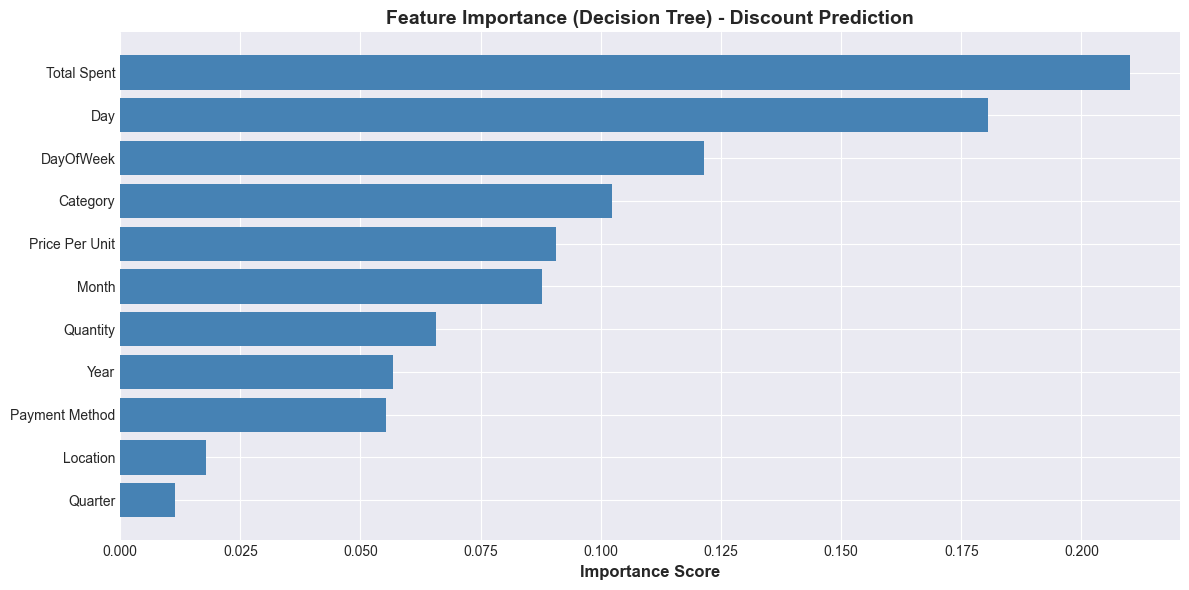


Top Features:
          Feature  Importance
3     Total Spent    0.210001
8             Day    0.180470
9       DayOfWeek    0.121474
0        Category    0.102338
1  Price Per Unit    0.090749
7           Month    0.087671
2        Quantity    0.065807
6            Year    0.056861
4  Payment Method    0.055302
5        Location    0.017842


In [18]:
# Decision Tree Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
plt.xlabel('Importance Score', fontweight='bold', fontsize=12)
plt.title('Feature Importance (Decision Tree) - Discount Prediction', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop Features:")
print(feature_importance.head(10))


## 7. Unsupervised Learning - K-Means Clustering



> After building supervised models to predict discounts, I wanted to explore the data from a different angle using unsupervised learning. K-Means clustering helps us discover natural groupings in the customer transaction data without using the discount label. This is valuable because it can reveal hidden patterns and customer segments that we might not have considered. For example, it might identify groups like "high-spending bulk buyers," "occasional shoppers," or "discount seekers" based purely on their transaction characteristics. These insights can help businesses tailor their marketing strategies and understand customer behavior beyond just whether they received a discount.



Finding optimal K using Elbow Method...
K=2: Inertia=63249.55, Silhouette=0.1346
K=3: Inertia=57335.56, Silhouette=0.1234
K=4: Inertia=54510.81, Silhouette=0.0993
K=5: Inertia=52406.39, Silhouette=0.0938
K=6: Inertia=50214.80, Silhouette=0.0944
K=7: Inertia=48711.74, Silhouette=0.0937
K=8: Inertia=47620.99, Silhouette=0.0900
K=9: Inertia=46588.56, Silhouette=0.0922
K=10: Inertia=45582.62, Silhouette=0.0924


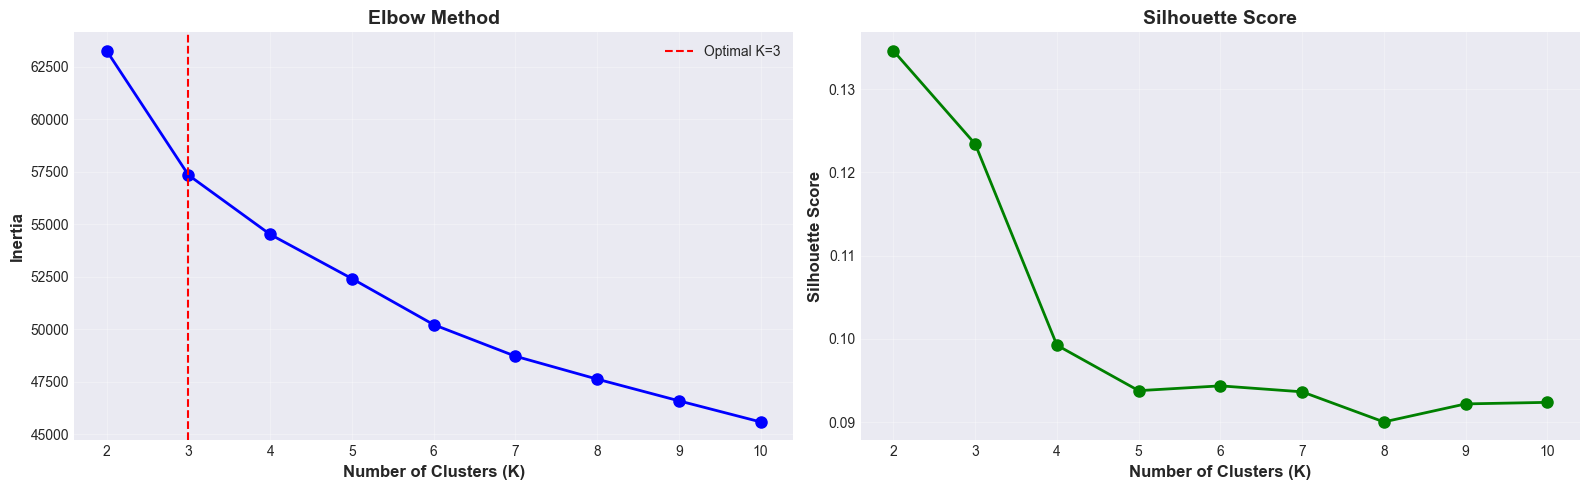


 Optimal K: 3


In [19]:
# Elbow method for finding optimal K
print("Finding optimal K using Elbow Method...")


inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train_scaled, kmeans.labels_))
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.4f}")

# Visualize elbow curve
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Inertia', fontweight='bold', fontsize=12)
axes[0].set_title('Elbow Method', fontweight='bold', fontsize=14)
axes[0].grid(alpha=0.3)
axes[0].axvline(x=3, color='red', linestyle='--', label='Optimal K=3')
axes[0].legend()

axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontweight='bold', fontsize=12)
axes[1].set_title('Silhouette Score', fontweight='bold', fontsize=14)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

optimal_k = 3
print(f"\n Optimal K: {optimal_k}")


In [20]:
# Train K-means with optimal K
print(f"\nTraining K-means with K={optimal_k}")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_train_scaled)

silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)

print(f"\nK-means Training Complete")
print(f"   • Clusters: {optimal_k}")
print(f"   • Inertia: {kmeans_final.inertia_:.2f}")
print(f"   • Silhouette Score: {silhouette_avg:.4f}")

print(f"\nCluster Distribution:")
for i in range(optimal_k):
    count = (cluster_labels == i).sum()
    percentage = count / len(cluster_labels) * 100
    print(f"   • Cluster {i}: {count} transactions ({percentage:.1f}%)")

print("="*70)


Training K-means with K=3

K-means Training Complete
   • Clusters: 3
   • Inertia: 57335.56
   • Silhouette Score: 0.1234

Cluster Distribution:
   • Cluster 0: 2530 transactions (37.8%)
   • Cluster 1: 2523 transactions (37.7%)
   • Cluster 2: 1647 transactions (24.6%)



Visualizing clusters in 2D using PCA
 PCA Applied:
   • Original dimensions: 11
   • Reduced dimensions: 2
   • Variance explained: 35.6%


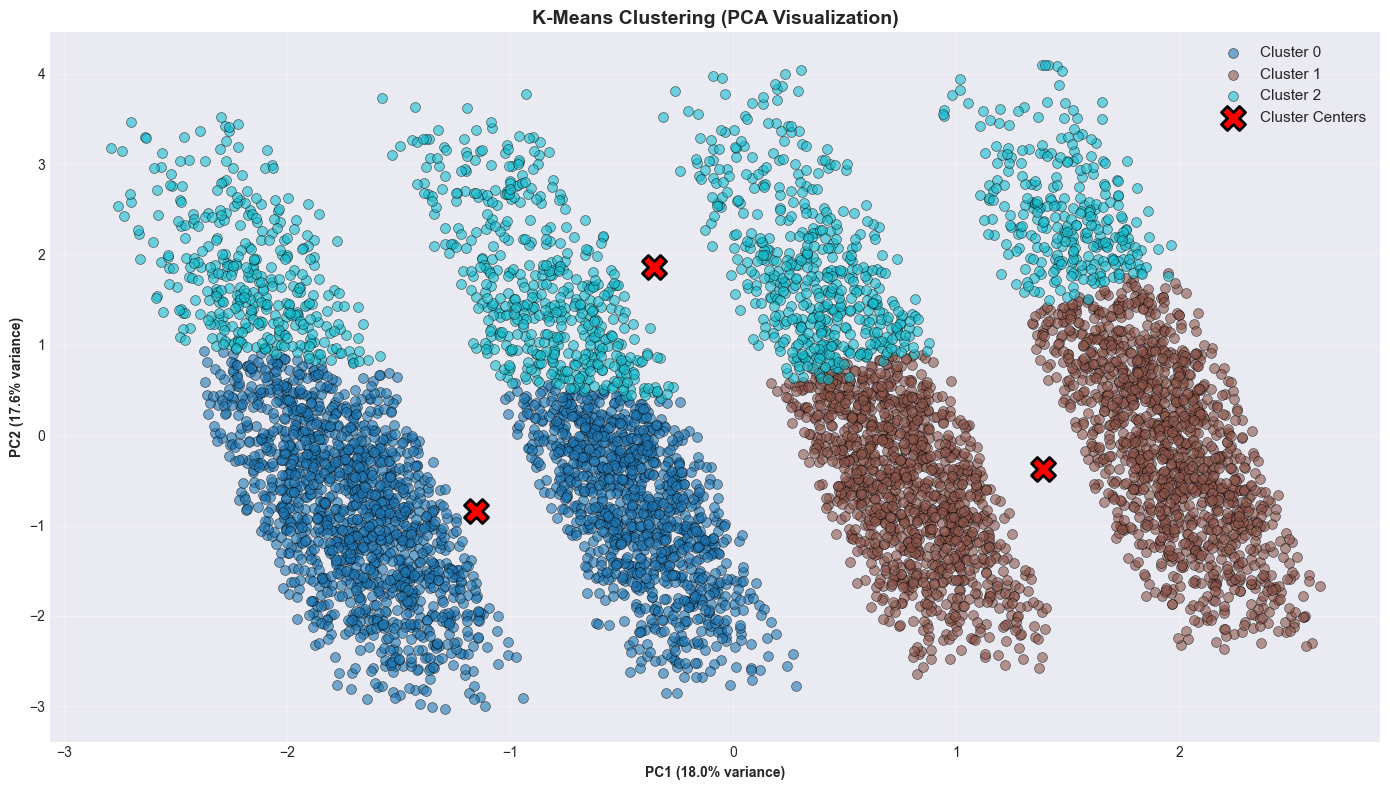

In [21]:
# Visualize clusters using PCA
print("\nVisualizing clusters in 2D using PCA")


pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)

print(f" PCA Applied:")
print(f"   • Original dimensions: {X_train_scaled.shape[1]}")
print(f"   • Reduced dimensions: 2")
print(f"   • Variance explained: {pca.explained_variance_ratio_.sum()*100:.1f}%")

# Create scatter plot
plt.figure(figsize=(14, 8))

colors = plt.cm.tab10(np.linspace(0, 1, optimal_k))
for i in range(optimal_k):
    cluster_mask = cluster_labels == i
    plt.scatter(X_train_pca[cluster_mask, 0],
                X_train_pca[cluster_mask, 1],
                c=[colors[i]],
                label=f'Cluster {i}',
                alpha=0.6,
                s=50,
                edgecolors='black',
                linewidth=0.5)

# Plot cluster centers
centers_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
            c='red', marker='X', s=300,
            edgecolors='black', linewidth=2,
            label='Cluster Centers')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontweight='bold')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontweight='bold')
plt.title('K-Means Clustering (PCA Visualization)', fontweight='bold', fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 8. Model Evaluation & Comparison

In [22]:
# Create comprehensive comparison
models_dict = {
    'Neural Network (MLP)': (y_pred_mlp, y_pred_mlp_proba, mlp_model),
    'Decision Tree': (y_pred_dt, y_pred_dt_proba, dt_model),
    'Naive Bayes': (y_pred_nb, y_pred_nb_proba, nb_model)
}

results = []

for model_name, (y_pred, y_pred_proba, model) in models_dict.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_pred_proba)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(results_df.to_string(index=False))
print("="*80)



MODEL COMPARISON SUMMARY
               Model  Accuracy  Precision   Recall  F1-Score  AUC-ROC
Neural Network (MLP)  0.513126   0.513109 0.649289  0.573222 0.510205
         Naive Bayes  0.492243   0.496216 0.543839  0.518937 0.493100
       Decision Tree  0.491647   0.494737 0.445498  0.468828 0.486823


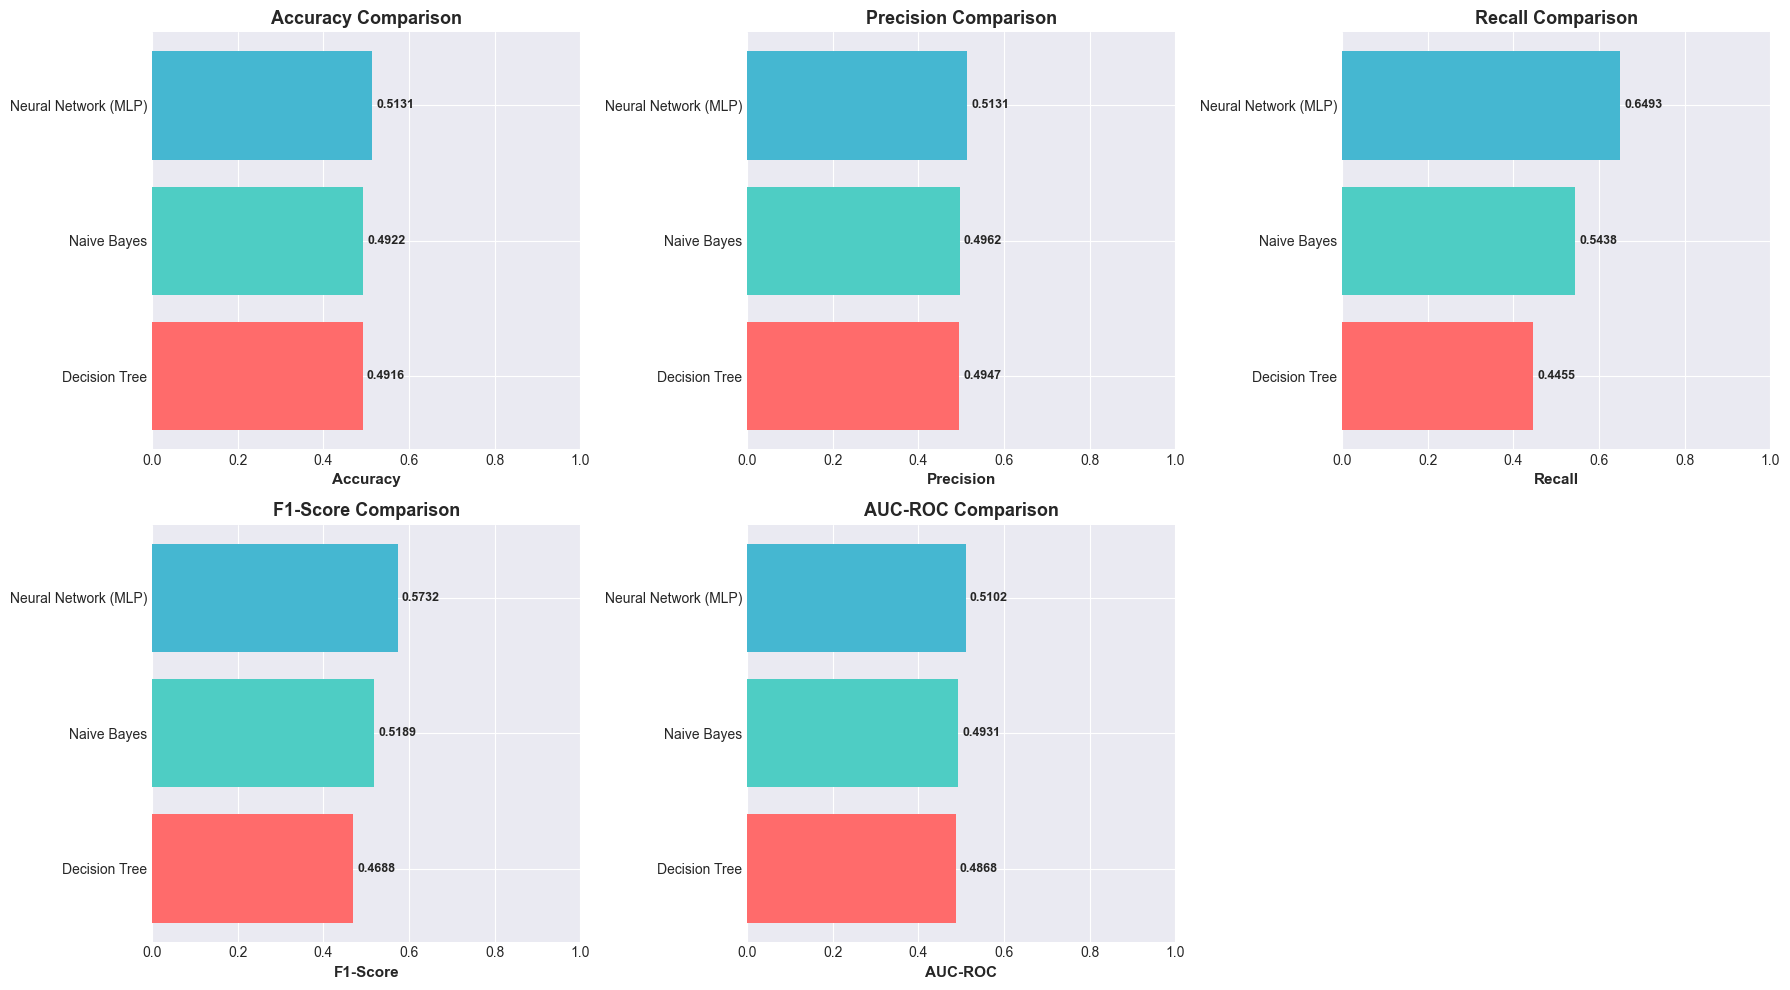

In [23]:
# Visualize model comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, metric in enumerate(metrics):
    data = results_df.sort_values(metric, ascending=True)
    axes[idx].barh(data['Model'], data[metric], color=colors)
    axes[idx].set_xlabel(metric, fontweight='bold', fontsize=11)
    axes[idx].set_title(f'{metric} Comparison', fontweight='bold', fontsize=13)
    axes[idx].set_xlim([0, 1])

    for i, v in enumerate(data[metric]):
        axes[idx].text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold', fontsize=9)

# Remove unused subplots
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()


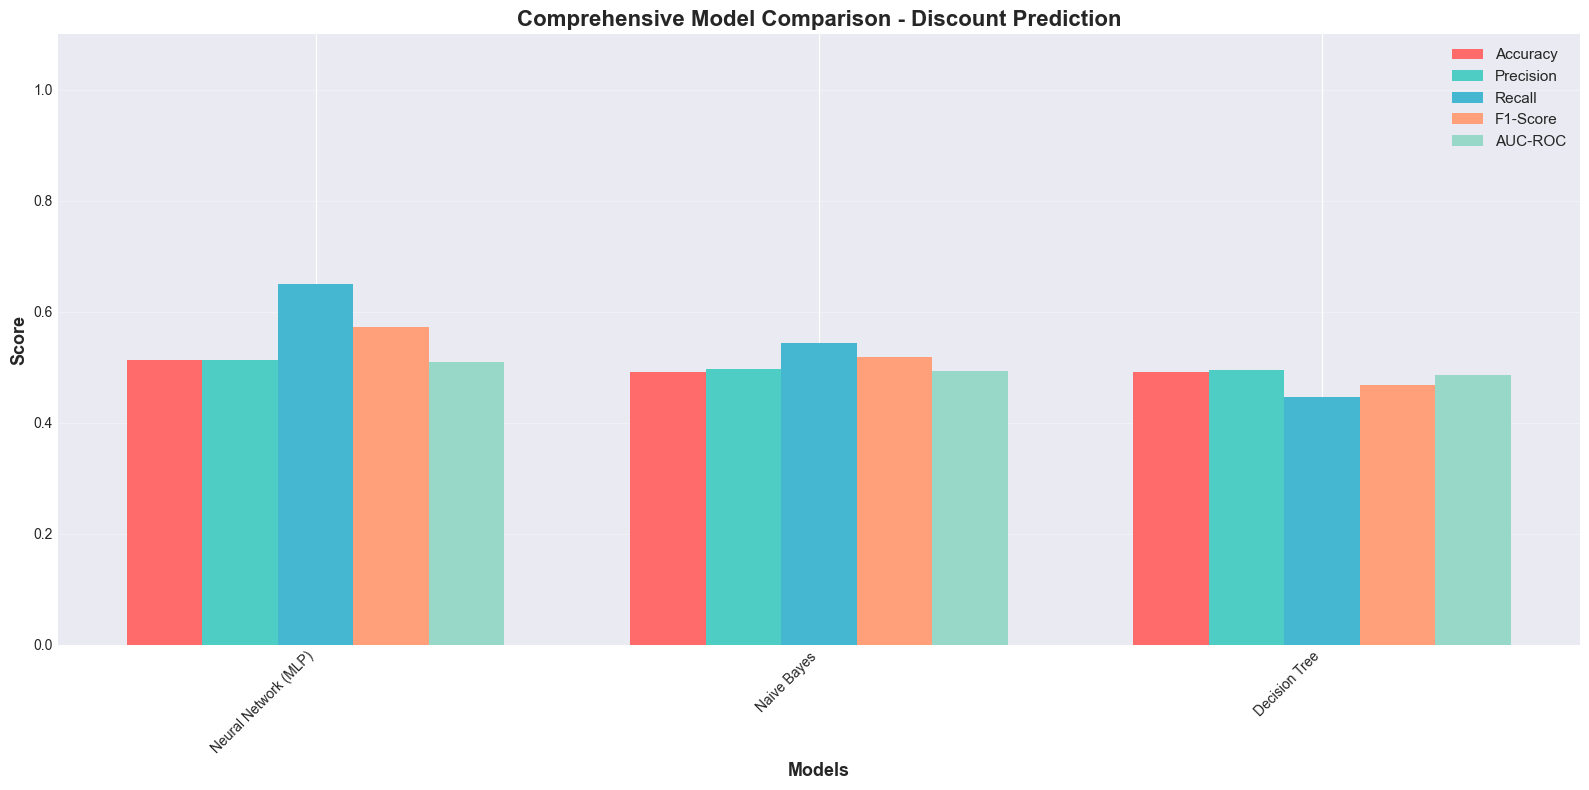

In [24]:
# Overall comparison chart
fig, ax = plt.subplots(figsize=(16, 8))

x = np.arange(len(results_df))
width = 0.15

ax.bar(x - 2*width, results_df['Accuracy'], width, label='Accuracy', color='#FF6B6B')
ax.bar(x - width, results_df['Precision'], width, label='Precision', color='#4ECDC4')
ax.bar(x, results_df['Recall'], width, label='Recall', color='#45B7D1')
ax.bar(x + width, results_df['F1-Score'], width, label='F1-Score', color='#FFA07A')
ax.bar(x + 2*width, results_df['AUC-ROC'], width, label='AUC-ROC', color='#98D8C8')

ax.set_xlabel('Models', fontweight='bold', fontsize=13)
ax.set_ylabel('Score', fontweight='bold', fontsize=13)
ax.set_title('Comprehensive Model Comparison - Discount Prediction', fontweight='bold', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend(fontsize=11)
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

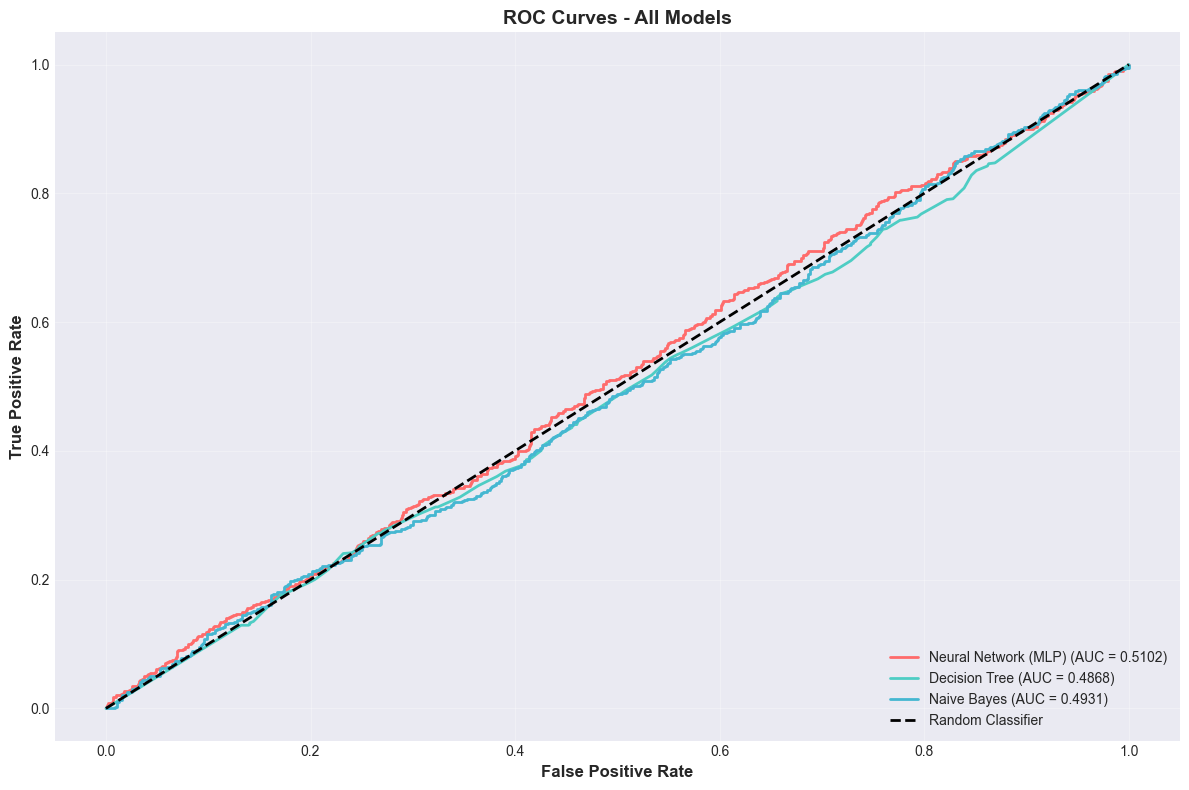

In [25]:
# Plot ROC curves
plt.figure(figsize=(12, 8))

colors_roc = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, (model_name, (y_pred, y_pred_proba, model)) in enumerate(models_dict.items()):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})', color=colors_roc[idx], linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=2)
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC Curves - All Models', fontweight='bold', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [26]:
# Get best model
best_model_name = results_df.iloc[0]['Model']
best_model_pred = models_dict[best_model_name][0]

print(f"\n{'='*80}")
print(f"BEST MODEL: {best_model_name}")
print(f"{'='*80}\n")

print("Classification Report:")
print(classification_report(y_test, best_model_pred, target_names=['No Discount', 'Discount Applied'], zero_division=0))


BEST MODEL: Neural Network (MLP)

Classification Report:
                  precision    recall  f1-score   support

     No Discount       0.51      0.38      0.43       832
Discount Applied       0.51      0.65      0.57       844

        accuracy                           0.51      1676
       macro avg       0.51      0.51      0.50      1676
    weighted avg       0.51      0.51      0.50      1676



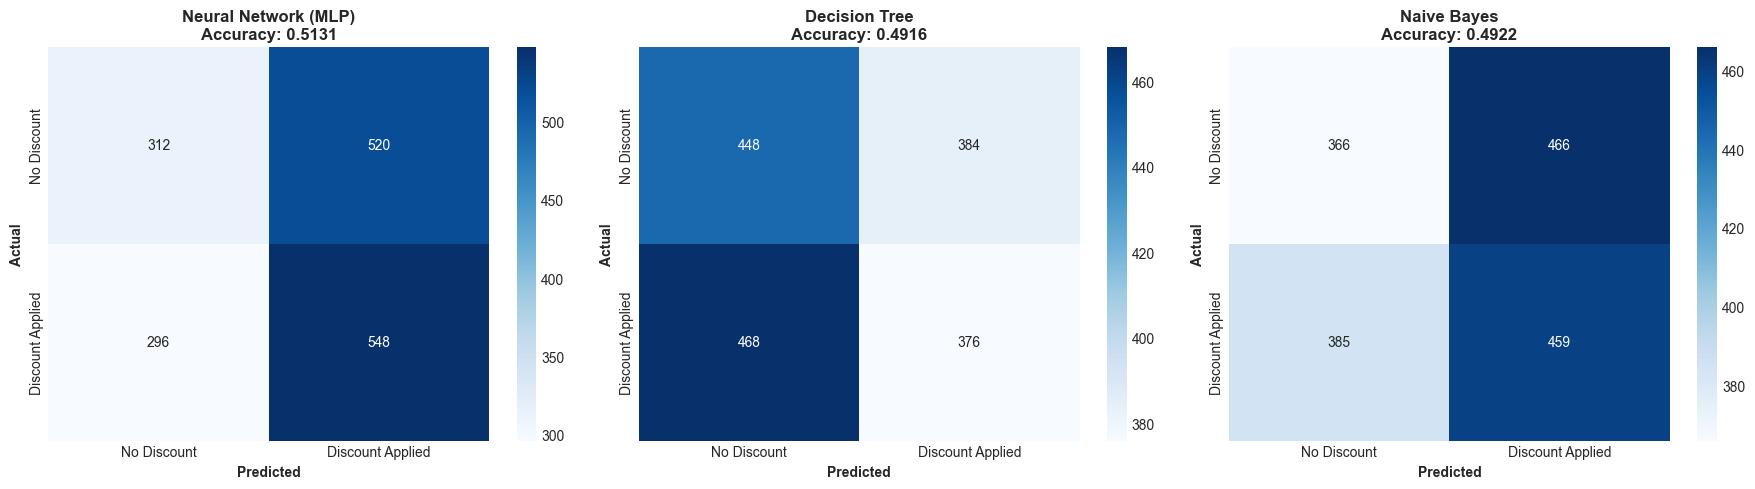

In [27]:
# Confusion matrices for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.ravel()

for idx, (model_name, (y_pred, y_pred_proba, model)) in enumerate(models_dict.items()):
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['No Discount', 'Discount Applied'],
                yticklabels=['No Discount', 'Discount Applied'])
    axes[idx].set_title(f'{model_name}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}',
                       fontweight='bold', fontsize=12)
    axes[idx].set_xlabel('Predicted', fontweight='bold')
    axes[idx].set_ylabel('Actual', fontweight='bold')

plt.tight_layout()
plt.show()
